In [14]:
import numpy as np
import matplotlib.pyplot as plt

o = np.linspace(0,150,200)

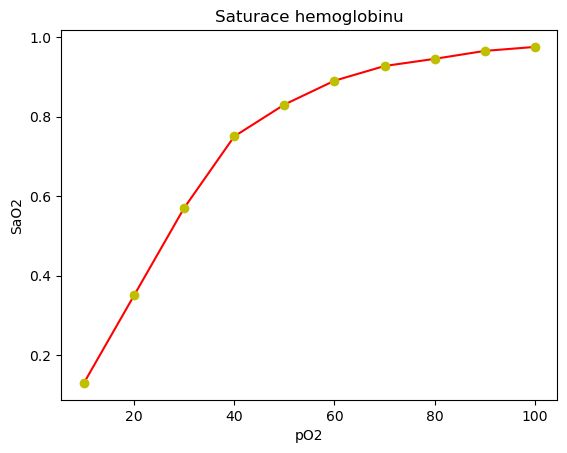

In [186]:
fig, ax = plt.subplots()

ax.set_xlabel('pO2') 
ax.set_ylabel('SaO2')
ax.set_title('Saturace hemoglobinu')

pp = np.array([10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0])
sat = np.array([13,35,57,75,83,89,92.7,94.5,96.5,97.5])/100
ax.plot(pp, sat, 'r', pp, sat,'oy')

fig

In [149]:
def f_o(o, K1 = 1, K2 = 1, K3 = 1,  K4 = 1):
    return(1 + K1*o + K1*K2*np.power(o, 2) +K1*K2*K3*np.power(o, 3) + K1*K2*K3*K4*np.power(o, 4))

def Hb(o, K1 = 1, K2 = 1, K3 = 1,  K4 = 1):
    return(1/f_o(o, K1, K2, K3,  K4))

def HbO(o, K1 = 1, K2 = 1, K3 = 1,  K4 = 1):
    return(K1*o/f_o(o, K1, K2, K3,  K4))

def HbO2(o, K1 = 1, K2 = 1, K3 = 1,  K4 = 1):
    return(K1*K2*np.power(o, 2)/f_o(o, K1, K2, K3,  K4))

def HbO3(o, K1 = 1, K2 = 1, K3 = 1,  K4 = 1):
    return(K1*K2*K3*np.power(o, 3)/f_o(o, K1, K2, K3,  K4))

def HbO4(o, K1 = 1, K2 = 1, K3 = 1,  K4 = 1):
    return(K1*K2*K3*K4*np.power(o, 4)/f_o(o, K1, K2, K3,  K4))

def SaO2(o, K1 = 1, K2 = 1, K3 = 1,  K4 = 1):
    return((HbO(o,K1,K2,K3,K4) + 2*HbO2(o,K1,K2,K3,K4) + 3*HbO3(o,K1,K2,K3,K4) + 4*HbO4(o,K1,K2,K3,K4))/4)

def chyba(K1,K2,K3,K4):
    global sat
    d = (SaO2(10.0,K1,K2,K3,K4)-sat[0])**2+(SaO2(20.0,K1,K2,K3,K4)-sat[1])**2+(SaO2(30.0,K1,K2,K3,K4)-sat[2])**2\
    +(SaO2(40.0,K1,K2,K3,K4)-sat[3])**2+(SaO2(50.0,K1,K2,K3,K4)-sat[4])**2+(SaO2(60.0,K1,K2,K3,K4)-sat[5])**2\
    +(SaO2(70.0,K1,K2,K3,K4)-sat[6])**2+(SaO2(80.0,K1,K2,K3,K4)-sat[7])**2+(SaO2(90.0,K1,K2,K3,K4)-sat[8])**2\
    +(SaO2(100.,K1,K2,K3,K4)-sat[9])**2
    return(d)

In [33]:
HbO2(o)+HbO3(o)+HbO(o)+HbO4(o)+Hb(o)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

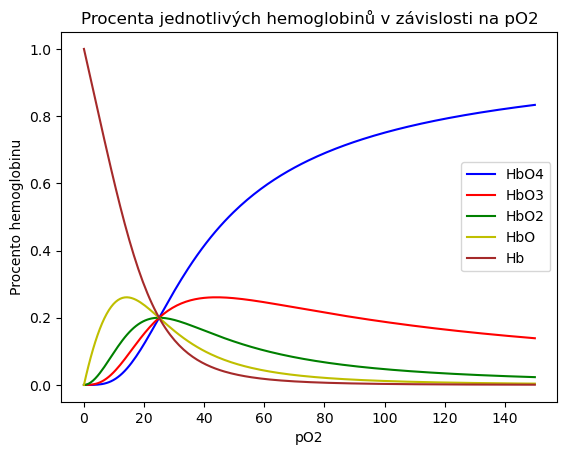

In [190]:
K = 0.04
K1 = K
K2 = K
K3 = K
K4 = K

# k=0.03
# K1 = 4.0*k
# K2 = 1.5*k
# K3 = 0.67*k
# K4 = 0.25*k

fig, ax = plt.subplots()

ax.plot(o, HbO4(o,K1,K2,K3,K4), 'b', label = 'HbO4')
ax.plot(o, HbO3(o,K1,K2,K3,K4), 'r', label = 'HbO3')
ax.plot(o, HbO2(o,K1,K2,K3,K4), 'g', label = 'HbO2')
ax.plot(o, HbO(o,K1,K2,K3,K4), 'y', label = 'HbO')
ax.plot(o, Hb(o,K1,K2,K3,K4), 'brown', label = 'Hb')
ax.set_xlabel('pO2') # Notice the use of set_ to begin methods
ax.set_ylabel('Procento hemoglobinu')
ax.set_title('Procenta jednotlivých hemoglobinů v závislosti na pO2')
ax.legend()
fig 

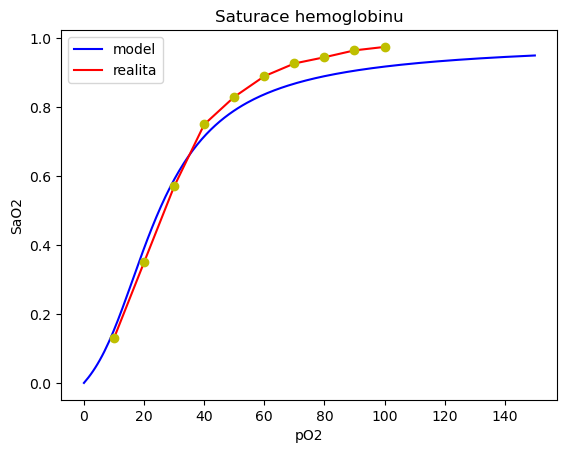

In [194]:
fig, ax = plt.subplots()

ax.plot(o, SaO2(o,K1,K2,K3,K4), 'b', label = 'model')
ax.set_xlabel('pO2') 
ax.set_ylabel('SaO2')
ax.set_title('Saturace hemoglobinu')

pp = np.array([10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0])
sat = np.array([13,35,57,75,83,89,92.7,94.5,96.5,97.5])/100
ax.plot(pp, sat, 'r', label = 'realita')
ax.plot(pp, sat,'oy')
ax.legend()
fig

In [110]:
pp

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [183]:
# initial values
K1 = 1.0
K2 = 2.0
K3 = 4.0
K4 = 8.0

delta = 0.005
for j in range(20000):
    i = 0
    max = chyba(K1,K2,K3,K4)
    if (chyba(K1+delta,K2,K3,K4)<max):
        i=1
        max=chyba(K1+delta,K2,K3,K4) 
    if (chyba(K1-delta,K2,K3,K4)<max):
        i=2
        max=chyba(K1-delta,K2,K3,K4) 
    if (chyba(K1,K2+delta,K3,K4)<max):
        i=3
        max=chyba(K1,K2+delta,K3,K4) 
    if (chyba(K1,K2-delta,K3,K4)<max):
        i=4
        max=chyba(K1,K2-delta,K3,K4) 
    if (chyba(K1,K2,K3+delta,K4)<max):
        i=5
        max=chyba(K1,K2,K3+delta,K4) 
    if (chyba(K1,K2,K3-delta,K4)<max):
        i=6
        max=chyba(K1,K2,K3-delta,K4) 
    if (chyba(K1,K2,K3,K4+delta)<max):
        i=7
        max=chyba(K1,K2,K3,K4+delta) 
    if (chyba(K1,K2,K3,K4-delta)<max):
        i=8 
  
    if (i==1):
        K1+=delta
    if (i==2):
        K1-=delta
    if (i==3):
        K2+=delta
    if (i==4):
        K2-=delta
    if (i==5):
        K3+=delta
    if (i==6):
        K3-=delta
    if (i==7):
        K4+=delta
    if (i==8):
        K4-=delta      
  

print(K1)
print(K2)
print(K3)
print(K4)

0.05999999999999917
0.015000000000020497
0.01500000000006313
0.25500000000014855


In [184]:
chyba(K1,K2,K3,K4)

0.000511034237582865